In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
data = pd.read_csv('../mvideo_features.csv')
data = data.drop_duplicates(subset=data.columns.difference(['product_id']), keep='first').reset_index(drop=True)
data.head(3)

,product_id,name,brand,Гарантия,Гарантия предоставляется,Страна,Год релиза,Серия,Состояние,Внешний вид,...,Разрешение дополнительного экрана по вертикали (Пикс),Разрешение дополнительного экрана по горизонтали (Пикс),Складной смартфон,Встроенный искусственный интеллект,Проводная гарнитура,Micro-SIM,Гарантия на аксессуары (мес.),Гарантия на АКБ (мес.),Дополнительная комплектация,Сканер радужной оболочки глаза
0,30063534,Смартфон Apple iPhone 13 128GB nanoSim/eSim Mi...,Apple,1 год,продавцом,Китай,2021.0,iPhone 13,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400410049,Смартфон HONOR X9c 12/256GB Titanium Black,HONOR,2 года,производителем,Китай,2025.0,X9c,новый,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400307033,Смартфон HUAWEI Pura 70 Pro 12/512GB White,HUAWEI,1 год,производителем,Китай,2024.0,Pura 70 Pro,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
desc = data[['salePrice', 'basePrice']].describe().T
desc['nan_count'] = data[['salePrice', 'basePrice']].isna().sum()
desc = desc[['count', 'nan_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(desc)

           count  nan_count          mean           std     min      25%  \
salePrice  929.0          0  62275.987083  51447.065499  5499.0  21999.0   
basePrice  929.0          0  74931.993541  58469.397968  6499.0  27999.0   

               50%       75%       max  
salePrice  44999.0   89990.0  299999.0  
basePrice  54999.0  109999.0  339999.0  


In [85]:
data["ln_price"] = np.log(data['salePrice'])
desc_sale = data['ln_price'].describe().to_frame().T
desc_sale['nan_count'] = data['ln_price'].isna().sum()
desc_sale = desc_sale[['count', 'nan_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(desc_sale)


          count  nan_count      mean       std       min       25%        50%  \
ln_price  929.0          0  10.69054  0.871821  8.612322  9.998752  10.714396   

                75%        max  
ln_price  11.407454  12.611534  


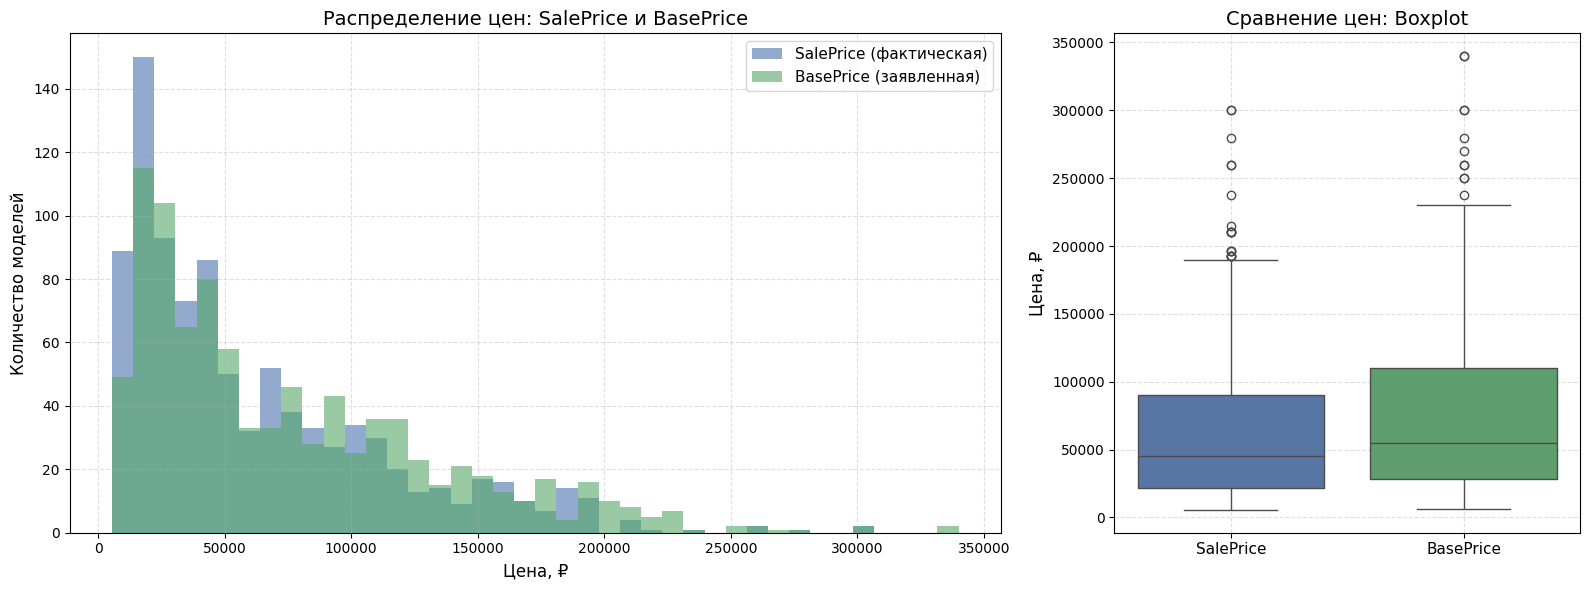

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

fig2, ax2 = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

colors = ['#4C72B0', '#55A868']

data[['salePrice', 'basePrice']].plot.hist(alpha=0.6, bins=40, ax=ax2[0], color=colors)
ax2[0].set_title('Распределение цен: SalePrice и BasePrice', fontsize=14)
ax2[0].set_xlabel('Цена, ₽', fontsize=12)
ax2[0].set_ylabel('Количество моделей', fontsize=12)
ax2[0].legend(['SalePrice (фактическая)', 'BasePrice (заявленная)'], fontsize=11)
ax2[0].grid(True, linestyle='--', alpha=0.4)

sns.boxplot(data=data[['salePrice', 'basePrice']], palette=colors, ax=ax2[1])
ax2[1].set_title('Сравнение цен: Boxplot', fontsize=14)
ax2[1].set_ylabel('Цена, ₽', fontsize=12)
ax2[1].set_xticklabels(['SalePrice', 'BasePrice'], fontsize=11)
ax2[1].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


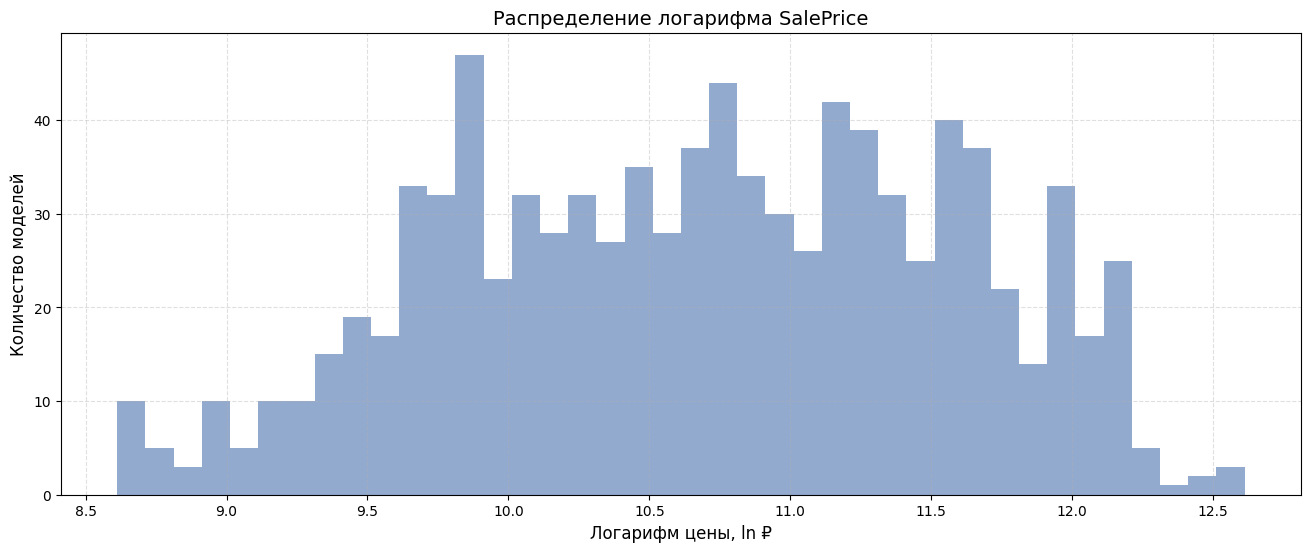

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

fig2, ax = plt.subplots(figsize=(16, 6))

# Цветовая палитра
colors = ['#4C72B0']

# Гистограммы слева
data['ln_price'].plot.hist(alpha=0.6, bins=40, ax=ax, color=colors)
ax.set_title('Распределение логарифма SalePrice', fontsize=14)
ax.set_xlabel('Логарифм цены, ln ₽', fontsize=12)
ax.set_ylabel('Количество моделей', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.4)


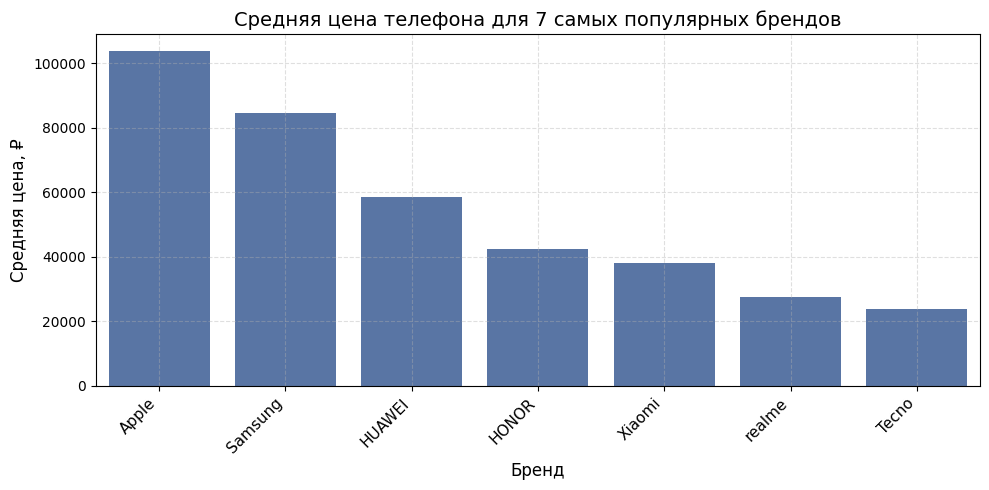

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

top_brands = data['brand'].value_counts().head(7).index
mean_prices = data[data['brand'].isin(top_brands)].groupby('brand')[['salePrice', 'basePrice']].mean().sort_values('salePrice', ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#4C72B0']
sns.barplot(data=mean_prices.reset_index(), x='brand', y='salePrice', color=colors[0], ax=ax)
ax.set_ylabel('Средняя цена, ₽', fontsize=12)
ax.set_xlabel('Бренд', fontsize=12)
ax.set_title('Средняя цена телефона для 7 самых популярных брендов', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [98]:
import re

df = pd.read_csv('../mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)

df.head(3)
columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Оптический зум на увеличение (x)',
                  'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Количество фронтальных камер (шт)', 'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Разрешение основной камеры (МПикс)', 
                  'Основная камера МПикс', 'Фронтальная камера МПикс', 'Материал корпуса']
target = ['salePrice']

df1 = df[columns_needed + target + ['product_id', 'name']]
df1[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df1['memory2'] = df1["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df1['memory3'] = df1["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df1['memory4'] = df1["name"].apply(lambda x: get_memory_from_name(x))
df1['memory'] = df1.apply(choose, axis=1)

# df1 = df1.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df1['height1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df1['width1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df1['depth1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df1['height2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df1['width2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df1['depth2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df1['height'] = df1.apply(choose_h, axis=1)
df1['width'] = df1.apply(choose_w, axis=1)
df1['depth'] = df1.apply(choose_d, axis=1)
df1['square'] = df1['height'] * df1['width']
df1['volume'] = df1['height'] * df1['width'] * df1['depth']

df1 = df1.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 
                        'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x



df1['video_resolution_v'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df1['video_resolution_h'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df1['screen_resolution_h'] = df1["Разрешение экрана"].apply(lambda x: get_res_0(x))
df1['screen_resolution_v'] = df1["Разрешение экрана"].apply(lambda x: get_res_1(x))

df1['screen_diag'] = df1["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df1 = df1.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return np.nan

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return np.nan


df1['dust_IP'] = df1["Степень защиты"].apply(lambda x: get_dust_IP(x))
df1['water_IP'] = df1["Степень защиты"].apply(lambda x: get_water_IP(x))

df1 = df1.drop(columns=["Степень защиты"])

df1['zoom'] = df1['Цифровой зум (x)']
df1['weight'] = df1['Вес (г)']
df1['kernel_cnt'] = df1['Количество ядер']
df1['screen_technology'] = df1['Технология экрана']
df1['power'] = df1['Мощность блока питания (Вт)']

df1 = df1.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)"])

metals = ['металл', 'титан', 'алюм', 'сталь']
df1['frame_has_metal'] = df1['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df1['frame_has_plastic'] = df1['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

data = df1

data['Год релиза'] = np.where(data['Год релиза'] != 2028, data['Год релиза'], 2023)

iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

# Нормализуем словарь: убираем "iPhone ", приводим к нижнему регистру
normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}
# print(normalized_battery_capacity)

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        # Приводим серию к тому же формату
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        # print(series)
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

data['Емкость аккумулятора (мАч)'] = data.apply(fill_iphone_capacity, axis=1)

data['standarts'] = data['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
data['is_5G'] = data['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
data['is_5G'] = data['is_5G'].astype(int)
data['year'] = np.where(data['Год релиза'] != 2028, data['Год релиза'], 2023)
data['quick_charge'] = (data['Поддержка быстрой зарядки'] == 'Да').astype(int)
# data.rename(columns={'Поддержка быстрой зарядки' : 'quick_charge'}, inplace=True)
data['wireless_charging'] = (data['Поддержка беспроводной зарядки'] == 'Да').astype(int)
data['ai'] = (data['Встроенный искусственный интеллект'] == 'Да').astype(int)
bin_size = 100
mean_battery = data['Емкость аккумулятора (мАч)'].mean()
data['battery_bin'] = (
	pd.to_numeric(data['Емкость аккумулятора (мАч)'], errors='coerce')
	.fillna(mean_battery)
	.apply(lambda x: int(x) // bin_size * bin_size if not pd.isna(x) else np.nan)
)
data['frameless'] = (data['Безрамочный'] == 'Да').astype(int)
data['used'] = (data['Состояние'] == 'восстановленный').astype(int)
data = data.rename(columns={'Емкость аккумулятора (мАч)' : 'battery', 
                            'Количество основных камер (шт)' : 'main_cams',
                            })

data['dop_screen'] = (data['Диагональ дополнительного экрана (")'].isna()).astype(int)
data['is_fold'] = (data['Диагональ в развернутом виде (")'].isna()).astype(int)

def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            mp_values.append(float(x))
        except ValueError:
            continue
    return mp_values

data['camera_mp_parsed'] = data['Основная камера МПикс'].apply(parse_camera)
data['front_camera'] = data['Фронтальная камера МПикс'].apply(parse_camera)

data['total_camera_mp'] = data['camera_mp_parsed'].apply(lambda x: sum(x) if x else 0)
data['total_front_camera'] = data['front_camera'].apply(lambda x: sum(x) if x else 0)

In [ ]:
data.columns

Index(['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Оптический зум на увеличение (x)',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки', 'battery',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Количество фронтальных камер (шт)', 'main_cams', 'Состояние',
       'Безрамочный', 'Разрешение основной камеры (МПикс)', 'salePrice',
       'product_id', 'name', 'memory', 'height', 'width', 'depth', 'square',
       'volume', 'video_resolution_v', 'video_resolution_h',
       'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'dust_IP',
       'water_IP', 'zoom', 'weight', 

Технические признаки

Основными, понятными многим, техническими характеристиками телефона являются разрешение экрана, память, количество основных и фронтальных камер, разрешение видеосъемки и фотографий, цифровой и оптический зум, емкость аккамулятора, степень защиты от воды и пыли, поддержка стандартов.

In [ ]:
data['standarts']

0      [2G, 3G, 4G, LTE, 5G]
1      [2G, 3G, 4G, LTE, 5G]
2          [2G, 3G, 4G, LTE]
3      [2G, 3G, 4G, LTE, 5G]
4          [2G, 3G, 4G, LTE]
               ...          
924    [2G, 3G, 4G, LTE, 5G]
925    [2G, 3G, 4G, LTE, 5G]
926    [2G, 3G, 4G, LTE, 5G]
927    [2G, 3G, 4G, LTE, 5G]
928    [2G, 3G, 4G, LTE, 5G]
Name: standarts, Length: 929, dtype: object

In [ ]:
# распределение поддержки стандартов
standarts = ['2G', '3G', '4G', 'LTE', '5G']

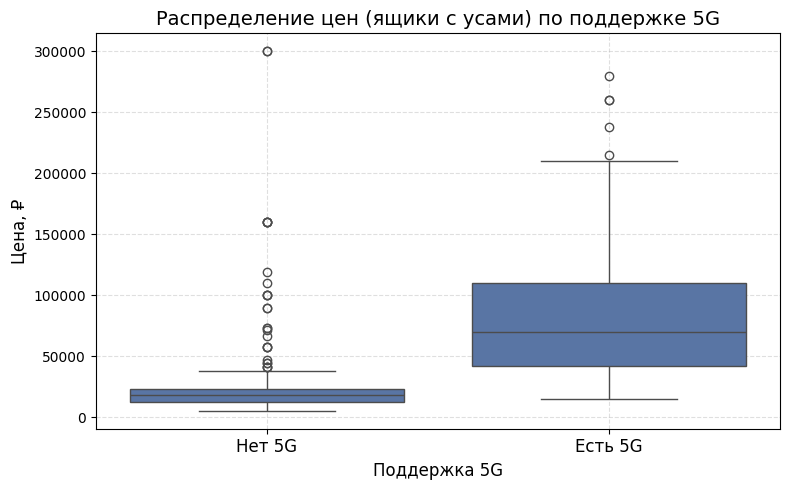

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=data, x='is_5G', y='salePrice', palette=colors, ax=ax)
ax.set_xticklabels(['Нет 5G', 'Есть 5G'], fontsize=12)
ax.set_xlabel('Поддержка 5G', fontsize=12)
ax.set_ylabel('Цена, ₽', fontsize=12)
ax.set_title('Распределение цен (ящики с усами) по поддержке 5G', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

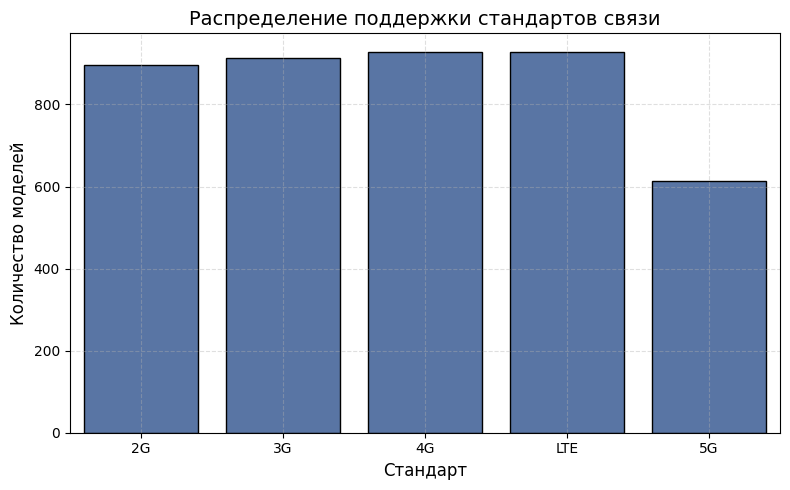

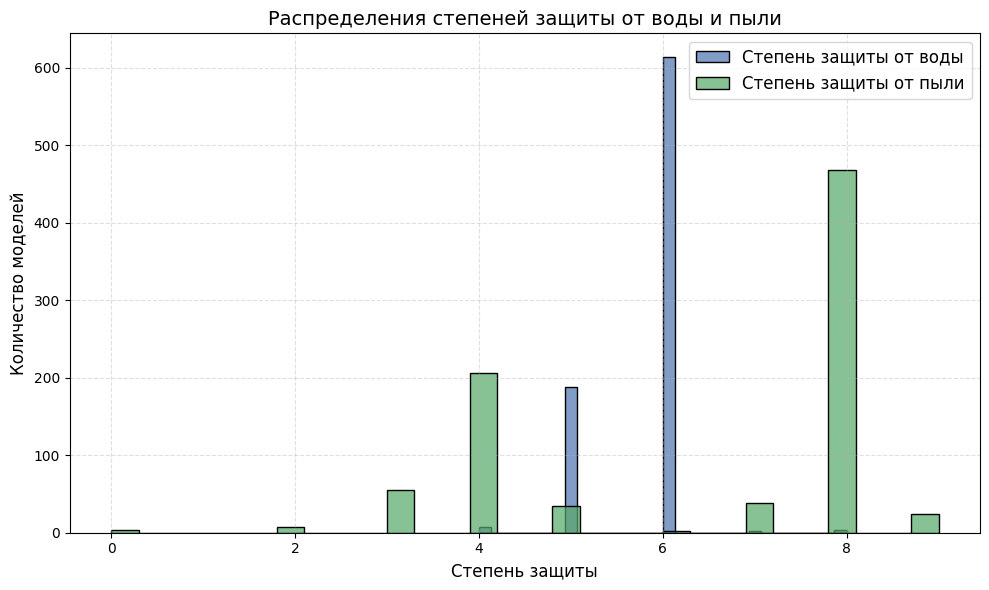

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['dust_IP'], bins=30, color='#4C72B0', alpha=0.7, label='Степень защиты от воды')
sns.histplot(data['water_IP'], bins=30, color='#55A868', alpha=0.7, label='Степень защиты от пыли')
ax.set_title('Распределения степеней защиты от воды и пыли', fontsize=14)
ax.set_xlabel('Степень защиты', fontsize=12)
ax.set_ylabel('Количество моделей', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

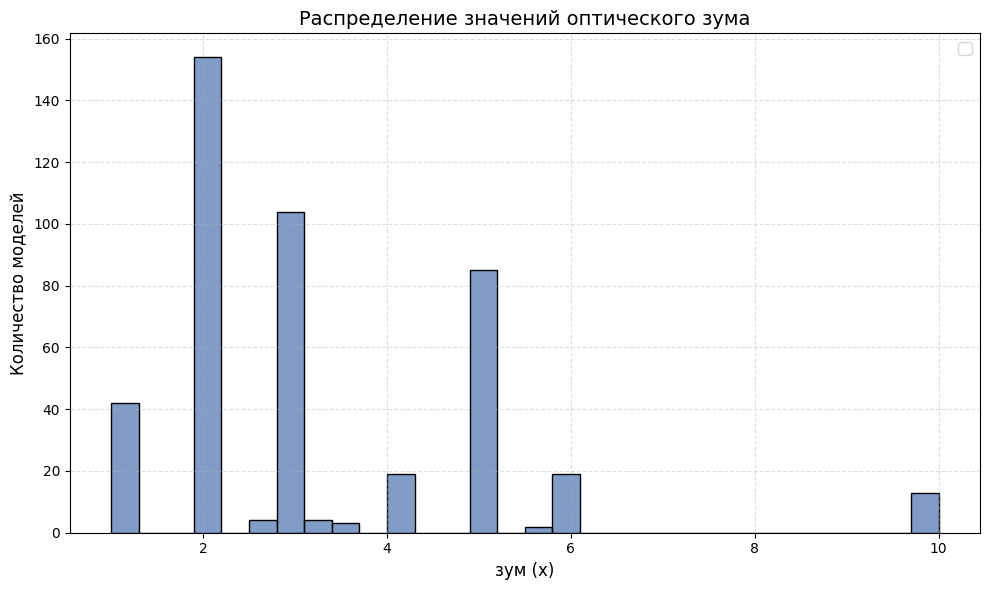

In [ ]:
# распределение признаков - оптический зум
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['Оптический зум на увеличение (x)'], bins=30, color='#4C72B0', alpha=0.7)
ax.set_title('Распределение значений оптического зума', fontsize=14)
ax.set_xlabel('зум (x)', fontsize=12)
ax.set_ylabel('Количество моделей', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

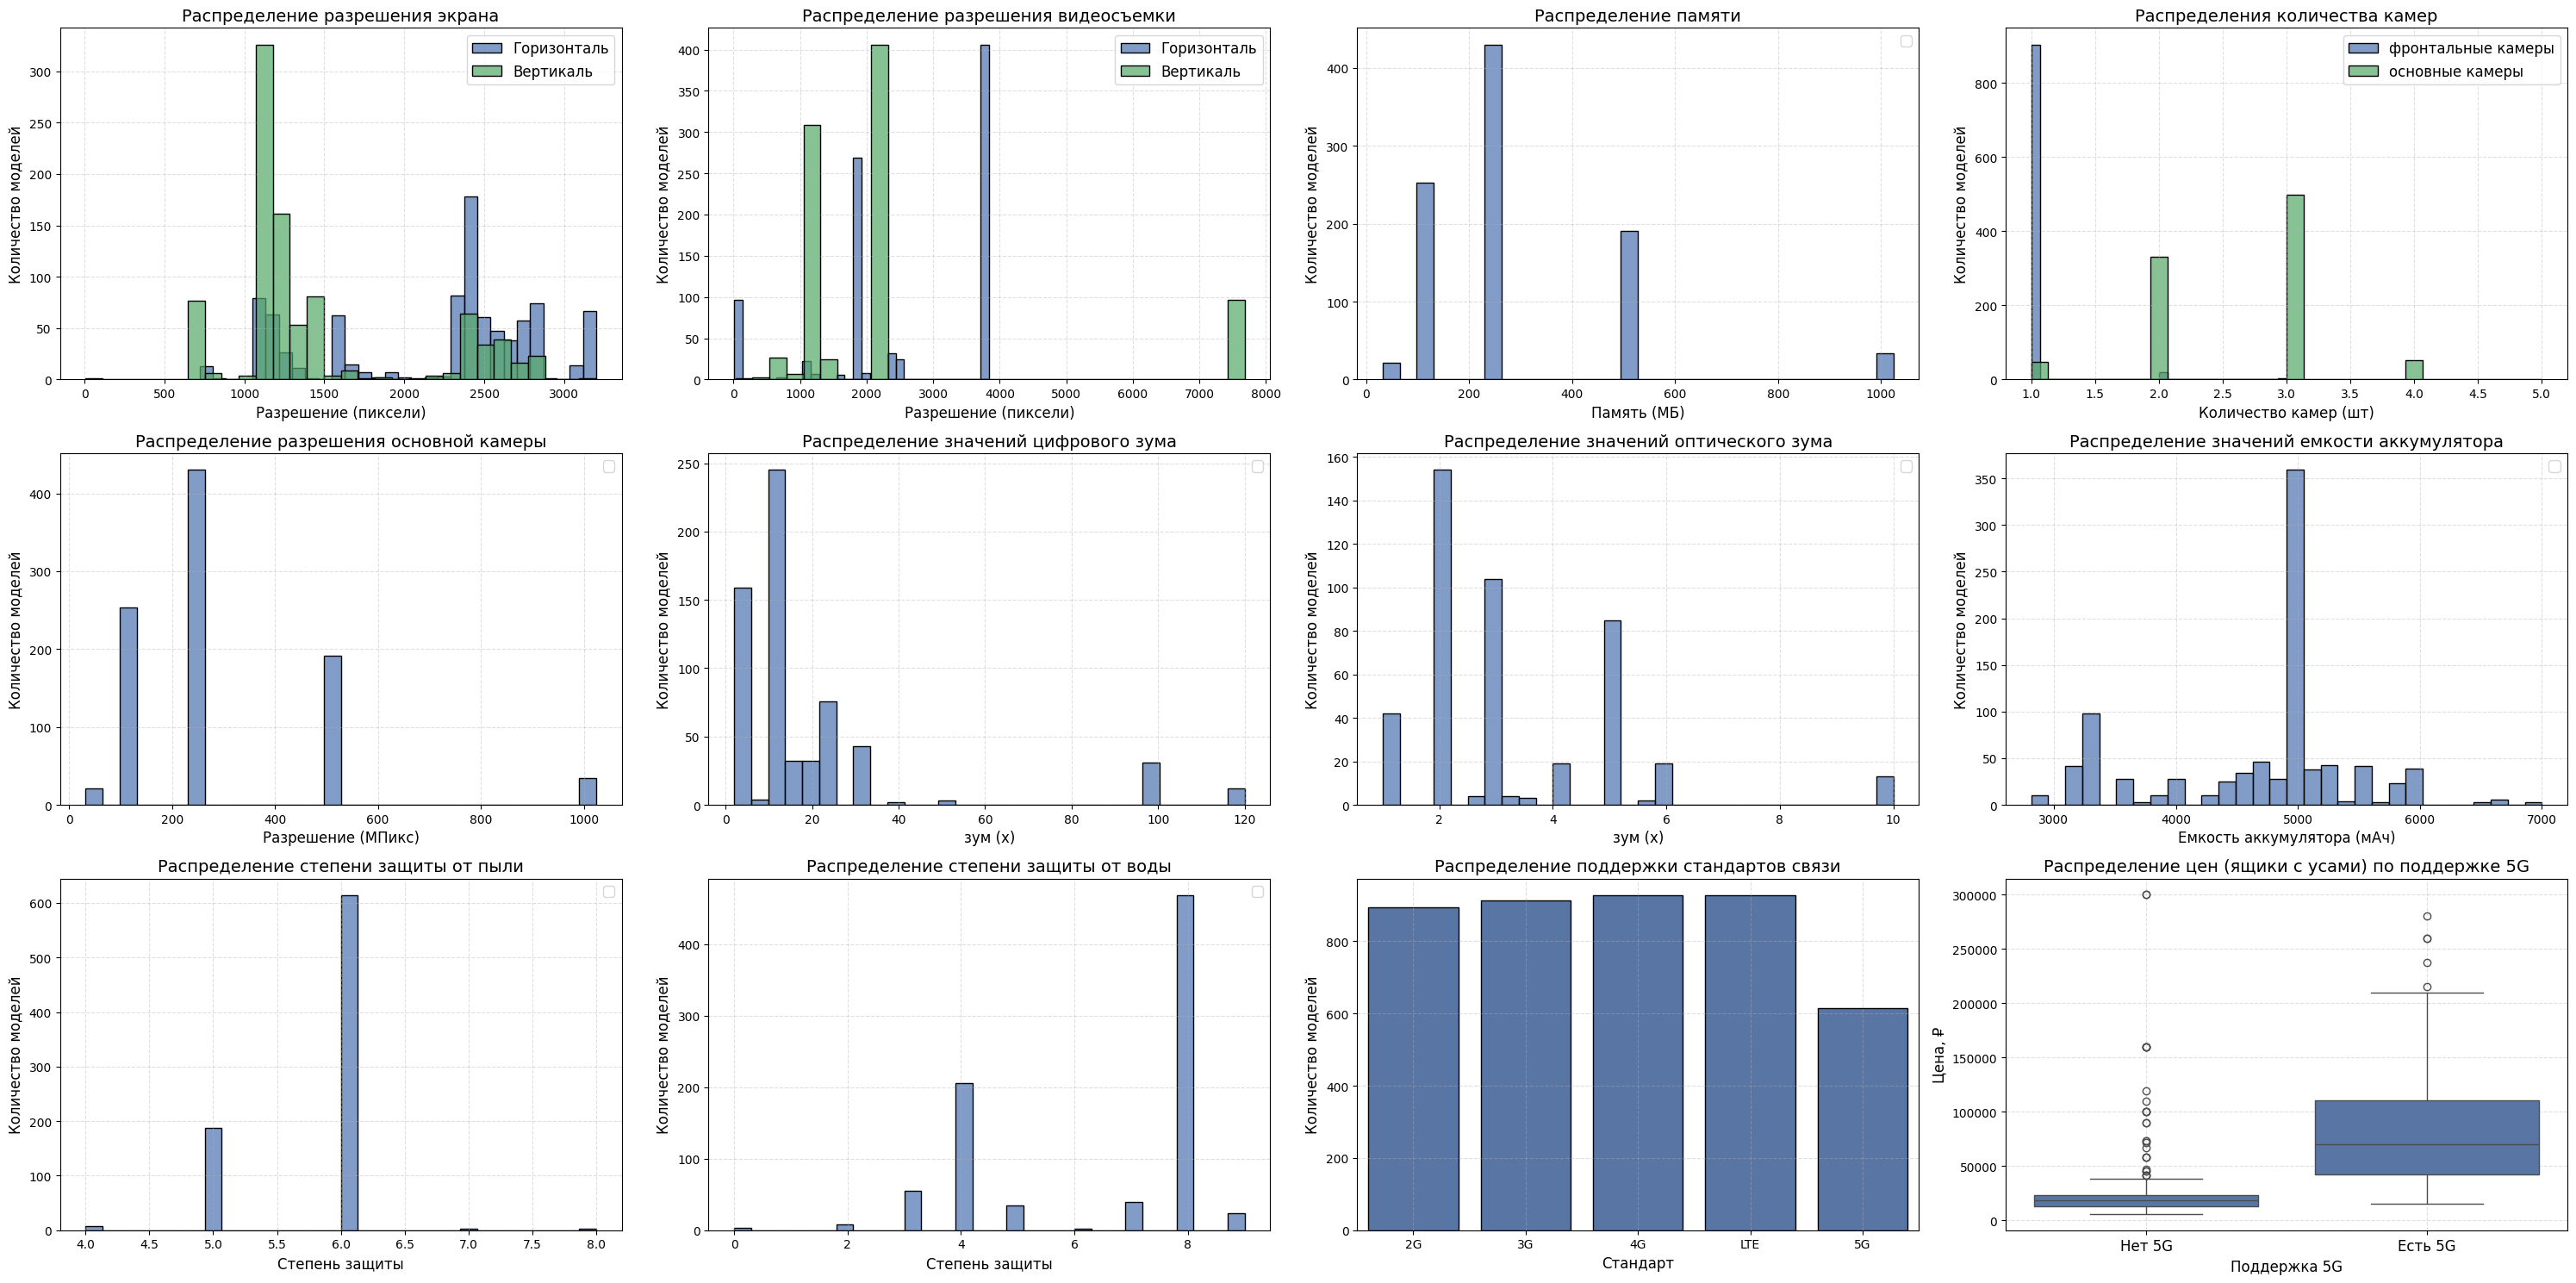

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(30, 15))
axes = axes.flatten()

# распределение признака - разрешение экрана 
# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['screen_resolution_h'], bins=30, color='#4C72B0', alpha=0.7, label='Горизонталь', ax=axes[0])
sns.histplot(data['screen_resolution_v'], bins=30, color='#55A868', alpha=0.7, label='Вертикаль', ax=axes[0])
axes[0].set_title('Распределение разрешения экрана', fontsize=14)
axes[0].set_xlabel('Разрешение (пиксели)', fontsize=12)
axes[0].set_ylabel('Количество моделей', fontsize=12)
axes[0].legend(fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)
# plt.tight_layout()
# plt.show()
# распределение признака - разрешение видеосъемки 
# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['video_resolution_h'], bins=30, color='#4C72B0', alpha=0.7, label='Горизонталь', ax=axes[1])
sns.histplot(data['video_resolution_v'], bins=30, color='#55A868', alpha=0.7, label='Вертикаль', ax=axes[1])
axes[1].set_title('Распределение разрешения видеосъемки', fontsize=14)
axes[1].set_xlabel('Разрешение (пиксели)', fontsize=12)
axes[1].set_ylabel('Количество моделей', fontsize=12)
axes[1].legend(fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()
# plt.show()
# распределение признака - память
# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['memory'], bins=30, color='#4C72B0', alpha=0.7, ax=axes[2])
axes[2].set_title('Распределение памяти', fontsize=14)
axes[2].set_xlabel('Память (МБ)', fontsize=12)
axes[2].set_ylabel('Количество моделей', fontsize=12)
axes[2].legend(fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()
# распределение признака - количество камер
# 'Количество фронтальных камер (шт)', 'Количество основных камер (шт)'
# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['Количество фронтальных камер (шт)'], bins=30, color='#4C72B0', alpha=0.7, label='фронтальные камеры', ax=axes[3])
sns.histplot(data['main_cams'], bins=30, color='#55A868', alpha=0.7, label='основные камеры', ax=axes[3])
axes[3].set_title('Распределения количества камер', fontsize=14)
axes[3].set_xlabel('Количество камер (шт)', fontsize=12)
axes[3].set_ylabel('Количество моделей', fontsize=12)
axes[3].legend(fontsize=12)
axes[3].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()
# распределение признака - Разрешение основной камеры (МПикс)
# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['memory'], bins=30, color='#4C72B0', alpha=0.7, ax=axes[4])
axes[4].set_title('Распределение разрешения основной камеры', fontsize=14)
axes[4].set_xlabel('Разрешение (МПикс)', fontsize=12)
axes[4].set_ylabel('Количество моделей', fontsize=12)
axes[4].legend(fontsize=12)
axes[4].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()
# количество камер 
# fig, ax = plt.subplots(figsize=(10, 6))
# зум
# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['zoom'], bins=30, color='#4C72B0', alpha=0.7, ax=axes[5])
axes[5].set_title('Распределение значений цифрового зума', fontsize=14)
axes[5].set_xlabel('зум (x)', fontsize=12)
axes[5].set_ylabel('Количество моделей', fontsize=12)
axes[5].legend(fontsize=12)
axes[5].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()
# распределение признаков - цифровой зум
# plt.show()
# распределение признаков - оптический зум
# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['Оптический зум на увеличение (x)'], bins=30, color='#4C72B0', alpha=0.7, ax=axes[6])
axes[6].set_title('Распределение значений оптического зума', fontsize=14)
axes[6].set_xlabel('зум (x)', fontsize=12)
axes[6].set_ylabel('Количество моделей', fontsize=12)
axes[6].legend(fontsize=12)
axes[6].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()
# распределение battery
# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['battery'], bins=30, color='#4C72B0', alpha=0.7, ax=axes[7])
axes[7].set_title('Распределение значений емкости аккумулятора', fontsize=14)
axes[7].set_xlabel('Емкость аккумулятора (мАч)', fontsize=12)
axes[7].set_ylabel('Количество моделей', fontsize=12)
axes[7].legend(fontsize=12)
axes[7].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['dust_IP'], bins=30, color='#4C72B0', alpha=0.7, ax=axes[8])
axes[8].set_title('Распределение cтепени защиты от пыли', fontsize=14)
axes[8].set_xlabel('Степень защиты', fontsize=12)
axes[8].set_ylabel('Количество моделей', fontsize=12)
axes[8].legend(fontsize=12)
axes[8].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['water_IP'], bins=30, color='#4C72B0', alpha=0.7, ax=axes[9])
axes[9].set_title('Распределение cтепени защиты от воды', fontsize=14)
axes[9].set_xlabel('Степень защиты', fontsize=12)
axes[9].set_ylabel('Количество моделей', fontsize=12)
axes[9].legend(fontsize=12)
axes[9].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()

# Подсчитаем количество моделей, поддерживающих каждый стандарт
standard_counts = {std: data['standarts'].apply(lambda x: std in x).sum() for std in standarts}

# Построим гистограмму
# fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(standard_counts.keys()), y=list(standard_counts.values()), color=colors[0], edgecolor='black', ax=axes[10])
axes[10].set_title('Распределение поддержки стандартов связи', fontsize=14)
axes[10].set_xlabel('Стандарт', fontsize=12)
axes[10].set_ylabel('Количество моделей', fontsize=12)
axes[10].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=data, x='is_5G', y='salePrice', palette=colors, ax=axes[11])
axes[11].set_xticklabels(['Нет 5G', 'Есть 5G'], fontsize=12)
axes[11].set_xlabel('Поддержка 5G', fontsize=12)
axes[11].set_ylabel('Цена, ₽', fontsize=12)
axes[11].set_title('Распределение цен (ящики с усами) по поддержке 5G', fontsize=14)
axes[11].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
#

Остальные факторы: (безрамочный или нет), материал корпуса, габаритные размеры. Вес, состояние, год релиза.

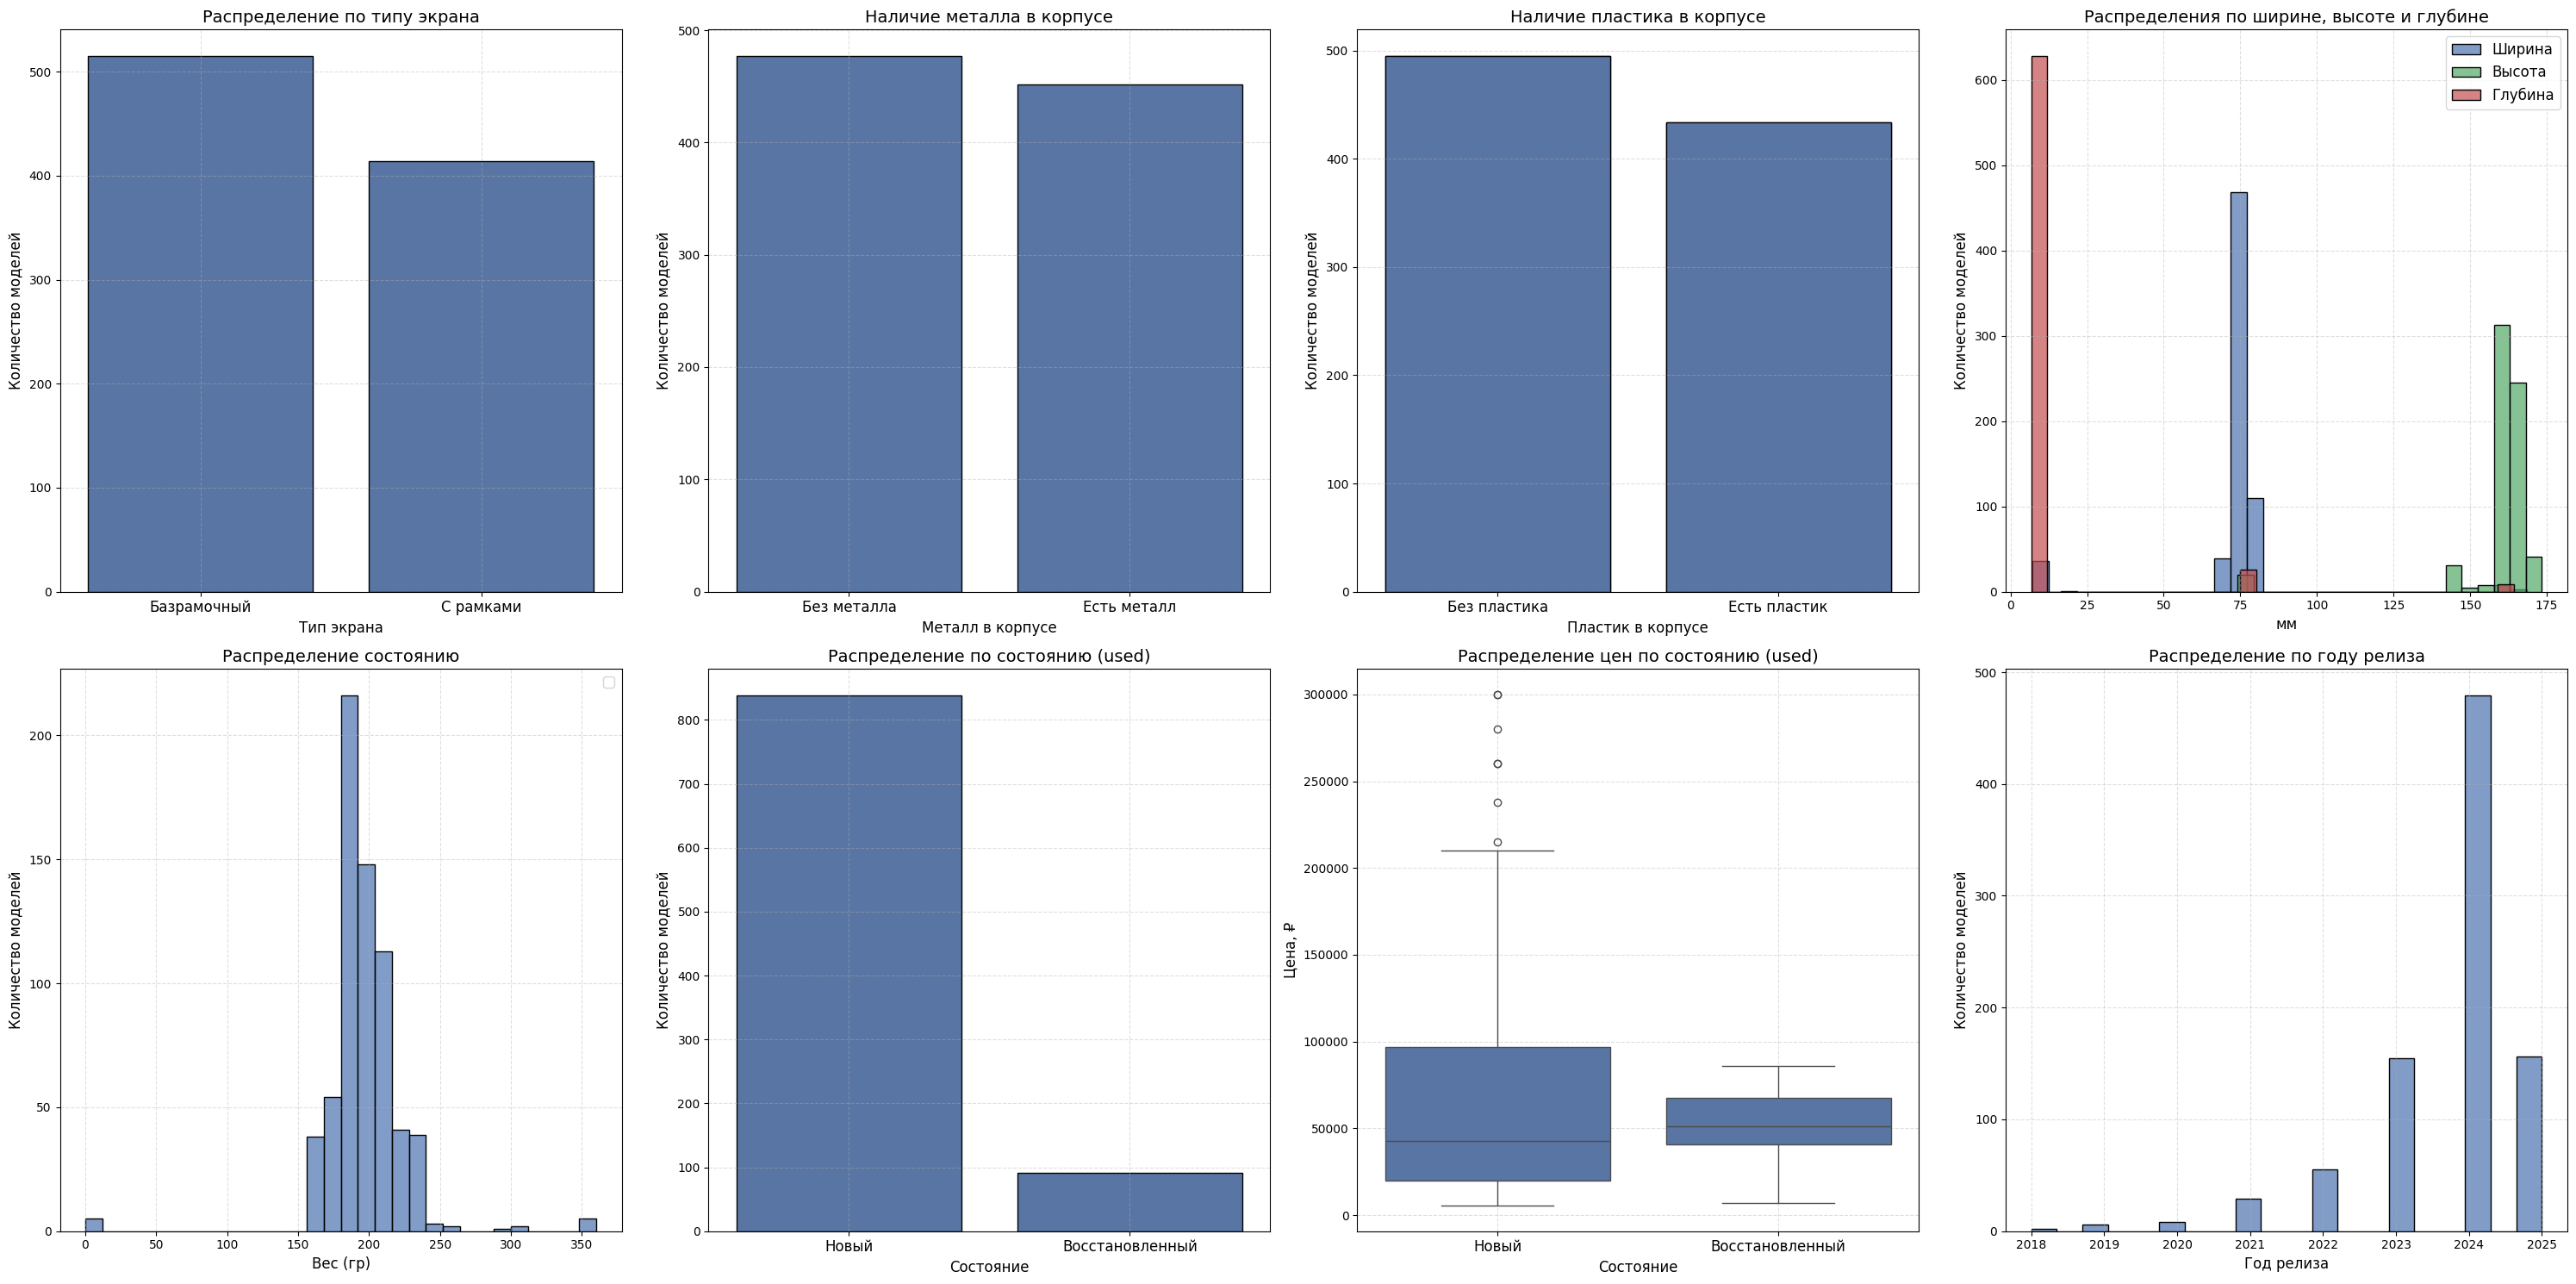

In [102]:
fig, axes = plt.subplots(2, 4, figsize=(30, 15))
axes = axes.flatten()
# тип экрана
screen_type_counts = data['frameless'].value_counts()
sns.barplot(x=screen_type_counts.index.astype(str), y=screen_type_counts.values, color=colors[0], edgecolor='black', ax=axes[0])
axes[0].set_xticklabels(['Базрамочный', 'С рамками'], fontsize=12)
axes[0].set_title('Распределение по типу экрана', fontsize=14)
axes[0].set_xlabel('Тип экрана', fontsize=12)
axes[0].set_ylabel('Количество моделей', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)


metal_counts = df1['frame_has_metal'].value_counts()
plastic_counts = df1['frame_has_plastic'].value_counts()

# Барплот для наличия металла в корпусе
sns.barplot(x=metal_counts.index.astype(str), y=metal_counts.values, color=colors[0], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['Без металла', 'Есть металл'], fontsize=12)
axes[1].set_title('Наличие металла в корпусе', fontsize=14)
axes[1].set_xlabel('Металл в корпусе', fontsize=12)
axes[1].set_ylabel('Количество моделей', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Барплот для наличия пластика в корпусе (axes[2])
sns.barplot(x=plastic_counts.index.astype(str), y=plastic_counts.values, color=colors[0], edgecolor='black', ax=axes[2])
axes[2].set_xticklabels(['Без пластика', 'Есть пластик'], fontsize=12)
axes[2].set_title('Наличие пластика в корпусе', fontsize=14)
axes[2].set_xlabel('Пластик в корпусе', fontsize=12)
axes[2].set_ylabel('Количество моделей', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.4)

sns.histplot(data['width'], bins=30, color='#4C72B0', alpha=0.7, label = 'Ширина', ax=axes[3])
sns.histplot(data['height'], bins=30, color='#55A868', alpha=0.7, label = 'Высота', ax=axes[3])
sns.histplot(data['depth'], bins=30, color='#C44E52', alpha=0.7, label = 'Глубина', ax=axes[3])
axes[3].set_title('Распределения по ширине, высоте и глубине', fontsize=14)
axes[3].set_xlabel('мм', fontsize=12)
axes[3].set_ylabel('Количество моделей', fontsize=12)
axes[3].legend(fontsize=12)
axes[3].grid(True, linestyle='--', alpha=0.4)
# plt.tight_layout()
# plt.show()

sns.histplot(data['weight'], bins=30, color='#4C72B0', alpha=0.7, ax=axes[4])
axes[4].set_title('Распределение по весу', fontsize=14)
axes[4].set_xlabel('Вес (гр)', fontsize=12)
axes[4].set_ylabel('Количество моделей', fontsize=12)
axes[4].legend(fontsize=12)
axes[4].grid(True, linestyle='--', alpha=0.4)
# plt.tight_layout()
# plt.show()

sns.barplot(x=plastic_counts.index.astype(str), y=plastic_counts.values, color=colors[0], edgecolor='black', ax=axes[2])
axes[4].set_title('Распределение состоянию', fontsize=14)
axes[4].set_xlabel('Вес (гр)', fontsize=12)
axes[4].set_ylabel('Количество моделей', fontsize=12)
axes[4].legend(fontsize=12)
axes[4].grid(True, linestyle='--', alpha=0.4)
# plt.tight_layout()
# plt.show()

# Axes 5: Барплот по признаку used (Новый, Восстановленный)
used_counts = data['used'].value_counts()
sns.barplot(x=used_counts.index.astype(str), y=used_counts.values, color=colors[0], edgecolor='black', ax=axes[5])
axes[5].set_xticklabels(['Новый', 'Восстановленный'], fontsize=12)
axes[5].set_title('Распределение по состоянию (used)', fontsize=14)
axes[5].set_xlabel('Состояние', fontsize=12)
axes[5].set_ylabel('Количество моделей', fontsize=12)
axes[5].grid(True, linestyle='--', alpha=0.4)

# Axes 6: Ящики с усами для распределения цены salePrice по признаку used
sns.boxplot(data=data, x='used', y='salePrice', palette=colors, ax=axes[6])
axes[6].set_xticklabels(['Новый', 'Восстановленный'], fontsize=12)
axes[6].set_xlabel('Состояние', fontsize=12)
axes[6].set_ylabel('Цена, ₽', fontsize=12)
axes[6].set_title('Распределение цен по состоянию (used)', fontsize=14)
axes[6].grid(True, linestyle='--', alpha=0.4)

# Axes 7: Гистограмма по году релиза
sns.histplot(data['year'], bins=20, color=colors[0], alpha=0.7, ax=axes[7])
axes[7].set_title('Распределение по году релиза', fontsize=14)
axes[7].set_xlabel('Год релиза', fontsize=12)
axes[7].set_ylabel('Количество моделей', fontsize=12)
axes[7].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



In [ ]:
# Axes 5: Барплот по признаку used (Новый, Восстановленный)
used_counts = data['used'].value_counts()
sns.barplot(x=used_counts.index.astype(str), y=used_counts.values, color=colors[0], edgecolor='black', ax=axes[5])
axes[5].set_xticklabels(['Новый', 'Восстановленный'], fontsize=12)
axes[5].set_title('Распределение по состоянию (used)', fontsize=14)
axes[5].set_xlabel('Состояние', fontsize=12)
axes[5].set_ylabel('Количество моделей', fontsize=12)
axes[5].grid(True, linestyle='--', alpha=0.4)

# Axes 6: Ящики с усами для распределения цены salePrice по признаку used
sns.boxplot(data=data, x='used', y='salePrice', palette=colors, ax=axes[6])
axes[6].set_xticklabels(['Новый', 'Восстановленный'], fontsize=12)
axes[6].set_xlabel('Состояние', fontsize=12)
axes[6].set_ylabel('Цена, ₽', fontsize=12)
axes[6].set_title('Распределение цен по состоянию (used)', fontsize=14)
axes[6].grid(True, linestyle='--', alpha=0.4)

# Axes 7: Гистограмма по году релиза
sns.histplot(data['year'], bins=20, color=colors[0], alpha=0.7, ax=axes[7])
axes[7].set_title('Распределение по году релиза', fontsize=14)
axes[7].set_xlabel('Год релиза', fontsize=12)
axes[7].set_ylabel('Количество моделей', fontsize=12)
axes[7].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [ ]:
# Распределение по типу экрана 

